In [22]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [23]:
env = BlackjackEnv()

In [24]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(num_episodes):
        observation = env.reset()
        # list of (state, reward)
        episode = []
        # Begin Episode
        while True:
            action = policy(observation)
            next_state, reward, done, _ = env.step(action)
            episode.append((observation, reward))
            if done:
                # The only reward is this last one
                break
            observation = next_state
        # End Episode

        states_visited = {} # state -> idx of first visit
        for i, step in enumerate(episode):
            state, reward = step
            if state not in states_visited:
                states_visited[state] = i
        
        for state, first_visit in states_visited.items():
            assert(episode[first_visit][0] == state)
            # find return
            G = 0
            gamma_exp = 1
            for i in range(first_visit, len(episode)):
                G += gamma_exp * episode[i][1]
                gamma_exp *= discount_factor
            returns_sum[state] += G
            returns_count[state] += 1.0
    
    # calculate V
    for state, count in returns_count.items():
        V[state] = returns_sum[state] / count

    return V    

In [25]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

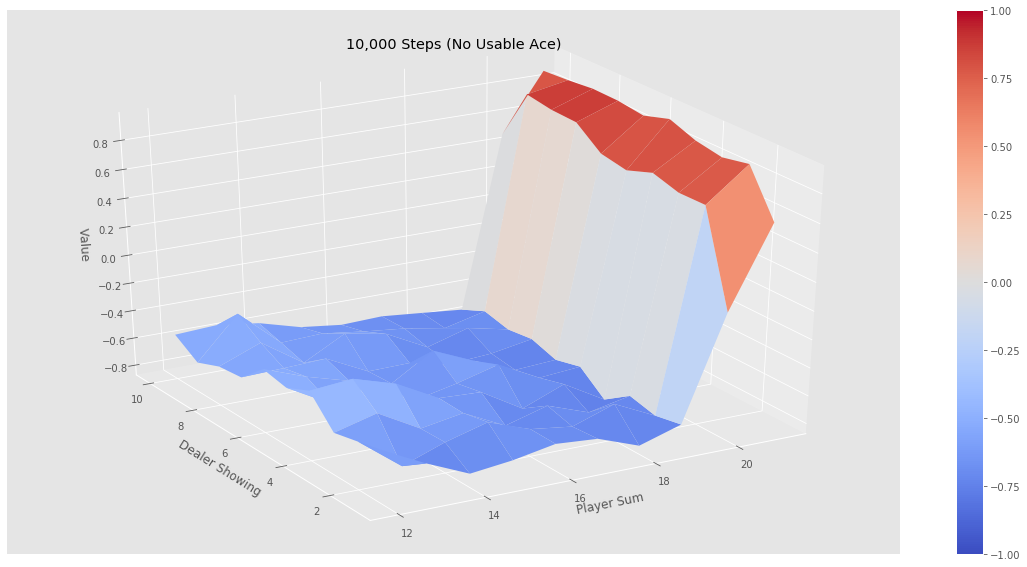

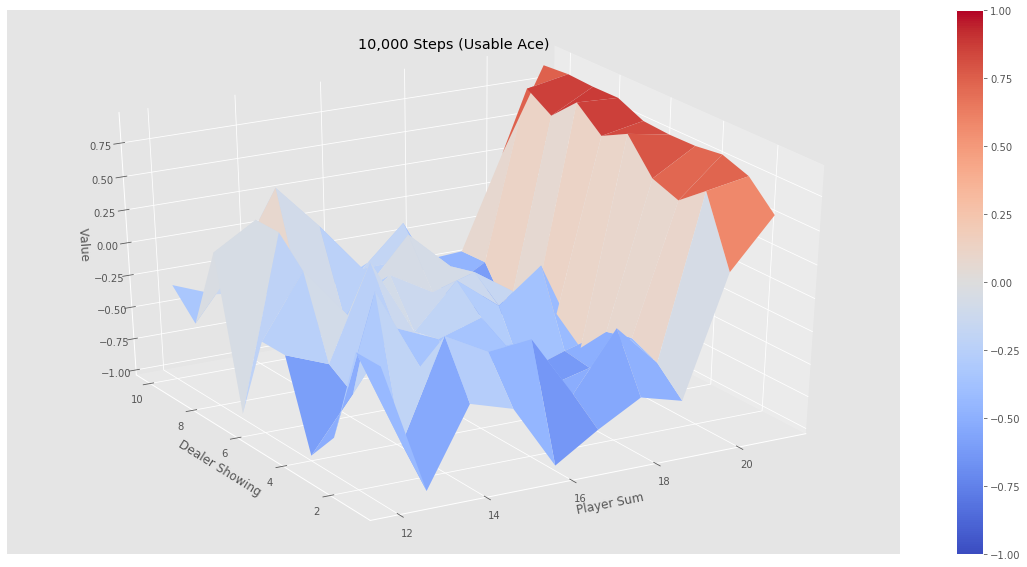

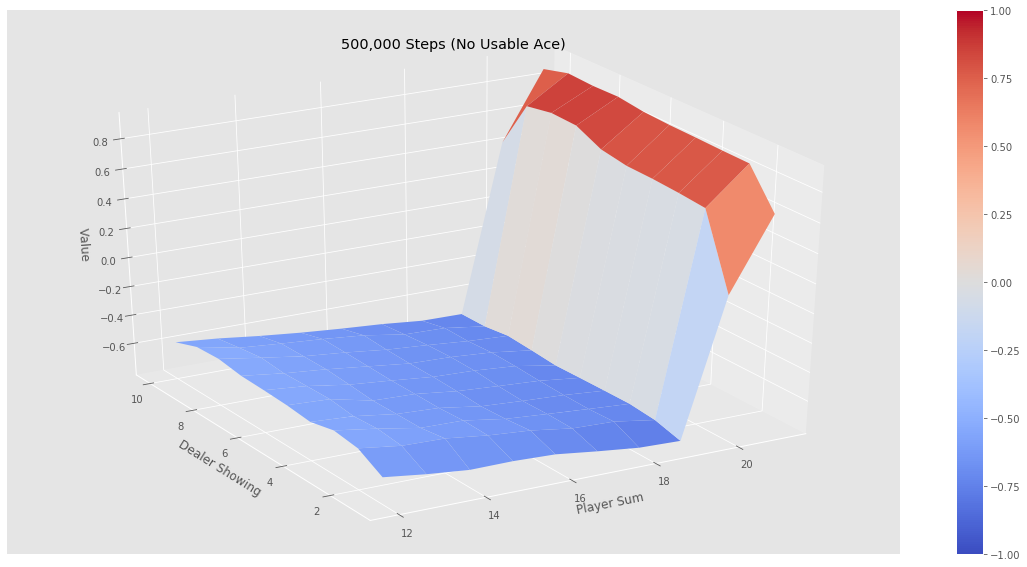

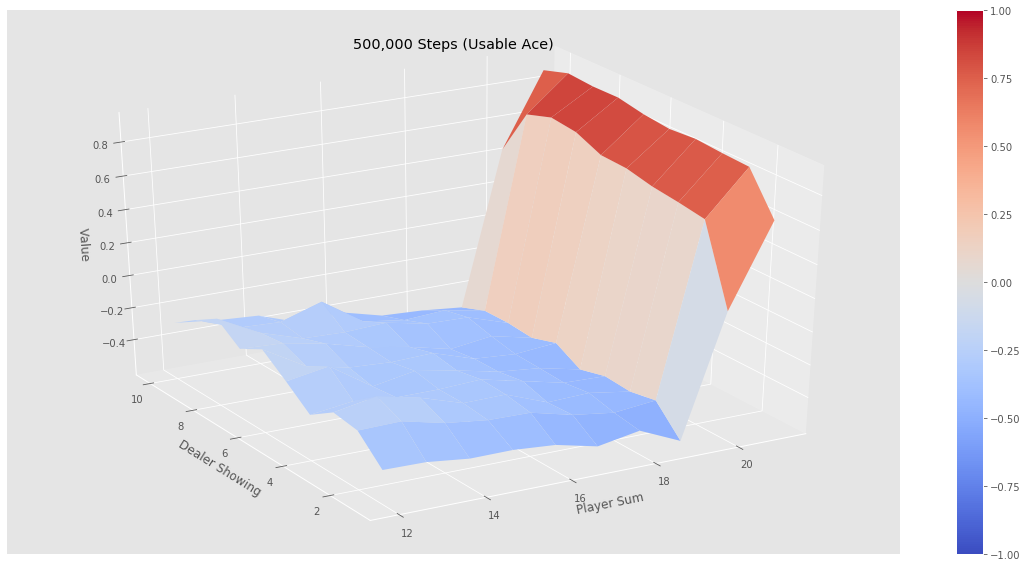

In [26]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")